<a href="https://colab.research.google.com/github/sujanpmonger-lab/Keystroke-Dynamics/blob/main/Keystroke_Dynamics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Week 1

In [5]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load datasets from your folder

In [6]:
import pandas as pd

# Path to your datasets folder
folder_path = "/content/drive/My Drive/Keystroke Dynamics/files"

# Full file paths
demographics_path = f"{folder_path}/demographics.csv"
fixed_text_path   = f"{folder_path}/fixed-text.csv"

# Read CSVs
demographics_df = pd.read_csv(demographics_path)
fixed_text_df   = pd.read_csv(fixed_text_path)

# Quick previews
print("=== Demographics.csv (first 5 rows) ===")
display(demographics_df.head())

print("\n=== Fixed-text.csv (first 5 rows) ===")
display(fixed_text_df.head())


=== Demographics.csv (first 5 rows) ===


,participant,handedness,age,gender,nationality
0,p001,Right-Handed,51,Male,Portugal
1,p002,Right-Handed,31,Male,Italy
2,p003,Right-Handed,21,Male,Poland
3,p004,Right-Handed,33,Male,Mexico
4,p005,Right-Handed,22,Male,Greece



=== Fixed-text.csv (first 5 rows) ===


,participant,session,repetition,DU.v.v,DD.v.p,DU.v.p,UD.v.p,UU.v.p,DU.p.p,DD.p.w,...,DU.r.k,UD.r.k,UU.r.k,DU.k.k.1,DD.k.b,DU.k.b,UD.k.b,UU.k.b,DU.b.b,total time
0,p001,1,1,0.129,1.917,1.804,2.046,1.933,0.113,0.719,...,1.289,1.509,1.423,0.086,0.450,0.352,0.536,0.438,0.098,10.101
1,p001,1,2,0.112,0.192,0.096,0.304,0.208,0.096,0.448,...,0.921,1.135,1.056,0.079,0.418,0.336,0.497,0.415,0.082,5.768
2,p001,1,3,0.088,0.253,0.182,0.341,0.270,0.071,1.536,...,1.066,1.271,1.194,0.077,0.448,0.352,0.525,0.429,0.096,7.877
3,p001,1,4,0.104,0.323,0.233,0.427,0.337,0.090,0.912,...,0.927,1.129,1.063,0.066,0.418,0.330,0.484,0.396,0.088,5.443
4,p001,1,5,0.107,0.188,0.100,0.295,0.207,0.088,0.858,...,1.237,1.423,1.344,0.079,0.457,0.369,0.536,0.448,0.088,5.284


Basic dataset info

In [7]:
# Demographics info
print("\n[Demographics] Shape:", demographics_df.shape)
print(demographics_df.info())
print("\nMissing values:\n", demographics_df.isna().sum())

# Fixed-text info
print("\n[Fixed-text] Shape:", fixed_text_df.shape)
print(fixed_text_df.info())
print("\nMissing values:\n", fixed_text_df.isna().sum())



[Demographics] Shape: (99, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   participant  99 non-null     object
 1   handedness   99 non-null     object
 2   age          99 non-null     int64 
 3   gender       99 non-null     object
 4   nationality  99 non-null     object
dtypes: int64(1), object(4)
memory usage: 4.0+ KB
None

Missing values:
 participant    0
handedness     0
age            0
gender         0
nationality    0
dtype: int64

[Fixed-text] Shape: (19772, 50)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19772 entries, 0 to 19771
Data columns (total 50 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   participant  19772 non-null  object 
 1   session      19772 non-null  int64  
 2   repetition   19772 non-null  int64  
 3   DU.v.v       19772 non-null  float64
 4   DD.v.p    

Week 2

In [10]:
from google.colab import drive
drive.mount('/content/drive')

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 180)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Set Folder Path & Load CSVs

In [11]:
# Path to your datasets folder
folder_path = "/content/drive/My Drive/Keystroke Dynamics/files"

# Full file paths
demographics_path = os.path.join(folder_path, "demographics.csv")
fixed_text_path   = os.path.join(folder_path, "fixed-text.csv")

# Load into DataFrames
demographics_df = pd.read_csv(demographics_path)
fixed_text_df   = pd.read_csv(fixed_text_path)

print("Loaded datasets:")
print(f" - demographics.csv: {demographics_df.shape}")
print(f" - fixed-text.csv: {fixed_text_df.shape}")


Loaded datasets:
 - demographics.csv: (99, 5)
 - fixed-text.csv: (19772, 50)


Structure, Dimensions, Dtypes

In [12]:
print("=== Structure & Dtypes ===")
print("\n[demographics] shape:", demographics_df.shape)
print(demographics_df.dtypes)

print("\n[fixed-text] shape:", fixed_text_df.shape)
print(fixed_text_df.dtypes)


=== Structure & Dtypes ===

[demographics] shape: (99, 5)
participant    object
handedness     object
age             int64
gender         object
nationality    object
dtype: object

[fixed-text] shape: (19772, 50)
participant     object
session          int64
repetition       int64
DU.v.v         float64
DD.v.p         float64
DU.v.p         float64
UD.v.p         float64
UU.v.p         float64
DU.p.p         float64
DD.p.w         float64
DU.p.w         float64
UD.p.w         float64
UU.p.w         float64
DU.w.w         float64
DD.w.j         float64
DU.w.j         float64
UD.w.j         float64
UU.w.j         float64
DU.j.j         float64
DD.j.k         float64
DU.j.k         float64
UD.j.k         float64
UU.j.k         float64
DU.k.k         float64
DD.k.e         float64
DU.k.e         float64
UD.k.e         float64
UU.k.e         float64
DU.e.e         float64
DD.e.u         float64
DU.e.u         float64
UD.e.u         float64
UU.e.u         float64
DU.u.u         float64
DD.

Summary Statistics

In [13]:
print("=== Summary Stats: demographics (all) ===")
display(demographics_df.describe(include="all").transpose())

print("\n=== Summary Stats: fixed-text (numeric only) ===")
display(fixed_text_df.describe().transpose())


=== Summary Stats: demographics (all) ===


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
participant,99,99,p001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
handedness,99,2,Right-Handed,91,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,99.0,NaN,NaN,NaN,24.484848,7.091765,18.0,20.0,22.0,25.0,51.0
gender,99,2,Male,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nationality,99,20,Poland,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN



=== Summary Stats: fixed-text (numeric only) ===


,count,mean,std,min,25%,50%,75%,max
session,19772.0,1.500405,0.500012,1.000,1.00000,2.0000,2.00000,2.000
repetition,19772.0,50.432177,28.831026,1.000,25.00000,50.0000,75.00000,107.000
DU.v.v,19772.0,0.097076,0.030586,0.001,0.07800,0.0930,0.11200,0.965
DD.v.p,19772.0,0.262902,0.609094,-0.061,0.13600,0.1955,0.29100,76.414
DU.v.p,19772.0,0.167657,0.609162,-0.172,0.04100,0.0980,0.20000,76.321
UD.v.p,19772.0,0.359979,0.609240,0.004,0.23200,0.2950,0.38800,76.451
UU.v.p,19772.0,0.264733,0.608517,0.001,0.13900,0.1990,0.29300,76.358
DU.p.p,19772.0,0.095246,0.029670,0.001,0.07500,0.0900,0.11100,0.250
DD.p.w,19772.0,0.405263,0.826127,-6.965,0.17700,0.2650,0.44900,67.362
DU.p.w,19772.0,0.302647,0.826035,-7.064,0.07600,0.1600,0.34900,67.254


Histograms (numeric columns)

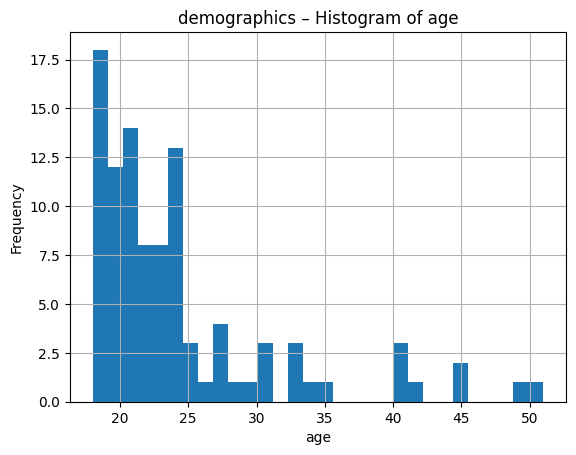

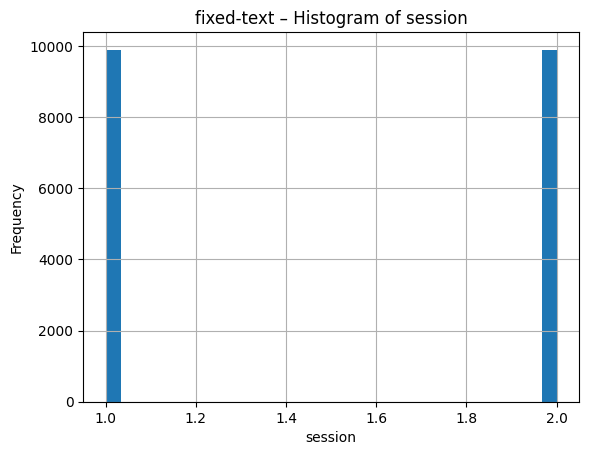

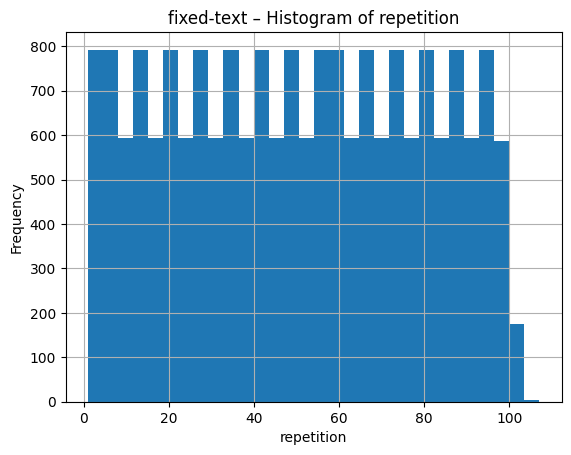

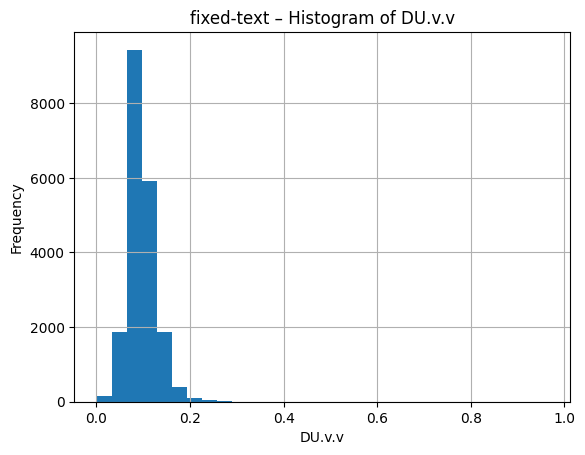

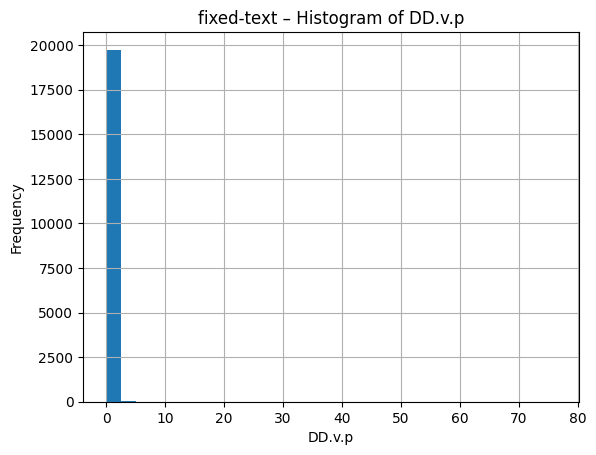

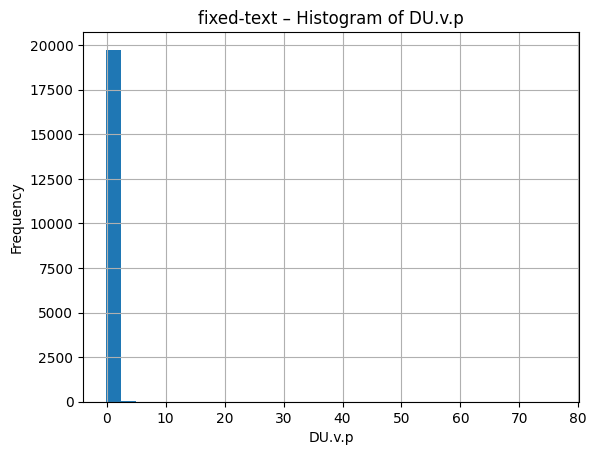

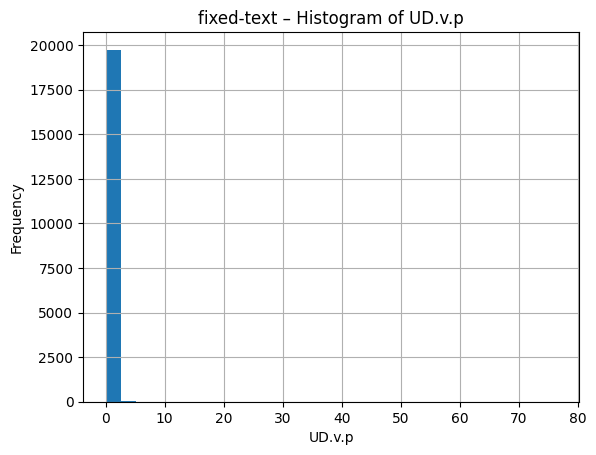

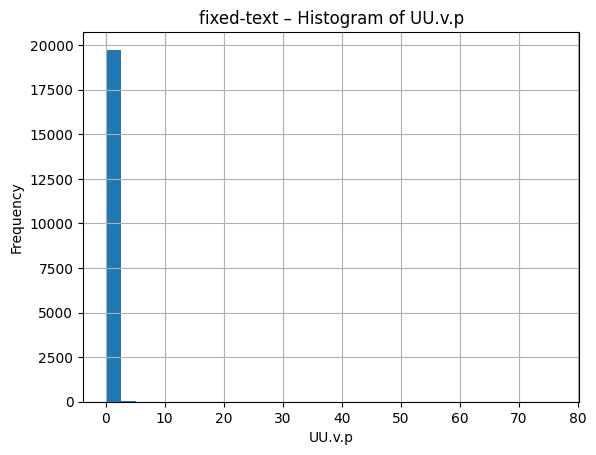

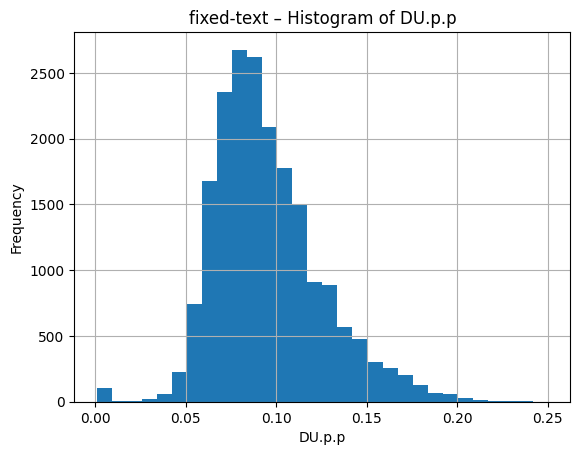

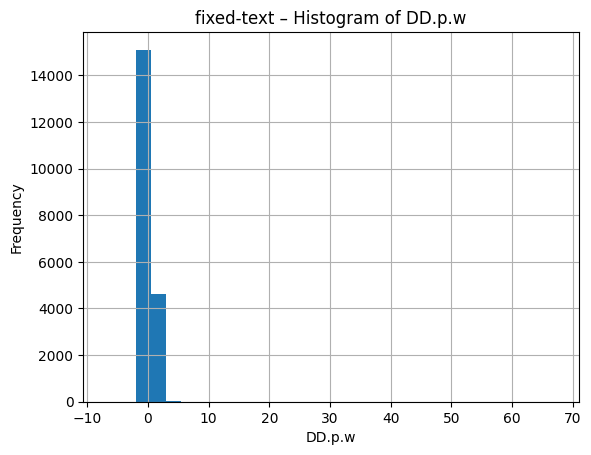

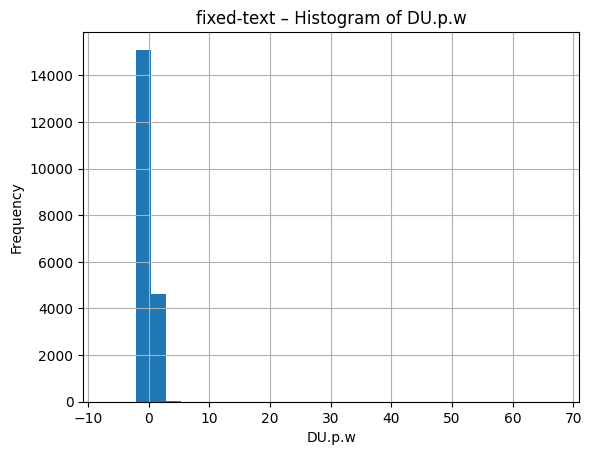

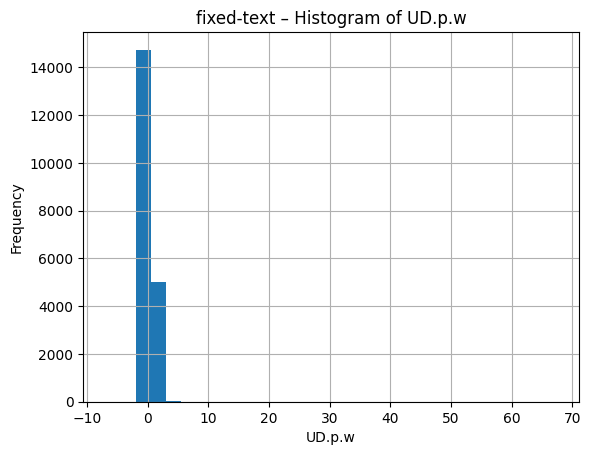

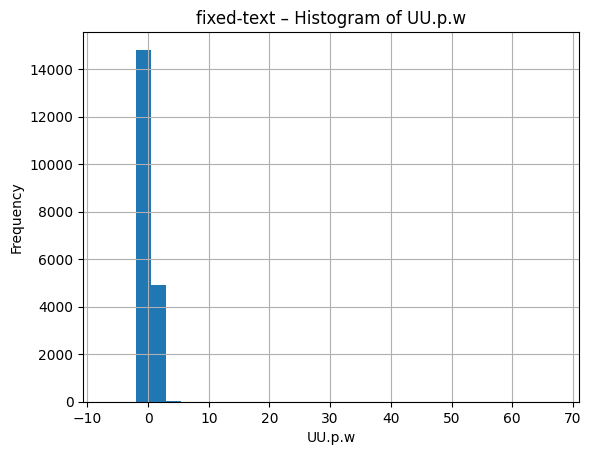

In [14]:
def plot_histograms(df, tag, max_cols=12, bins=30):
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()[:max_cols]
    for col in num_cols:
        plt.figure()
        df[col].dropna().hist(bins=bins)
        plt.title(f"{tag} – Histogram of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()

plot_histograms(demographics_df, "demographics")
plot_histograms(fixed_text_df, "fixed-text")


Boxplots (subset of numeric columns)

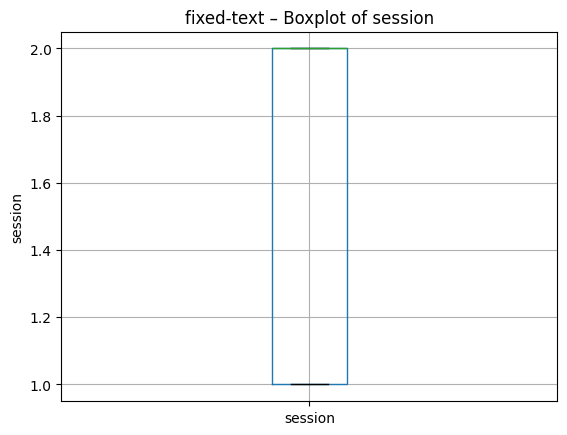

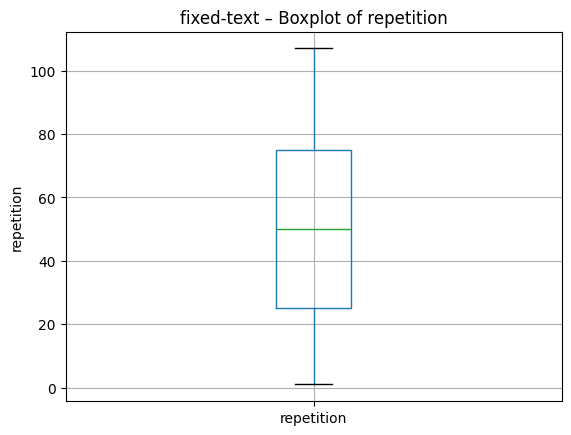

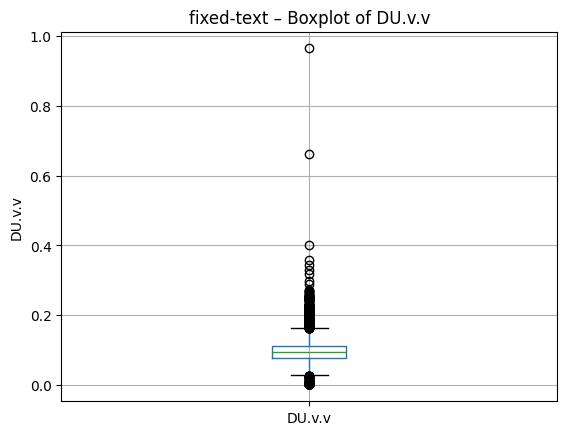

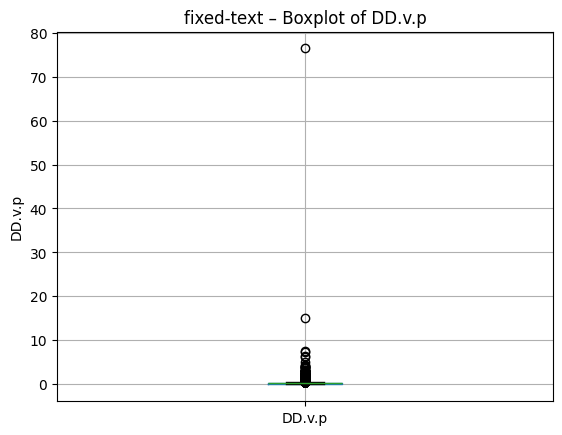

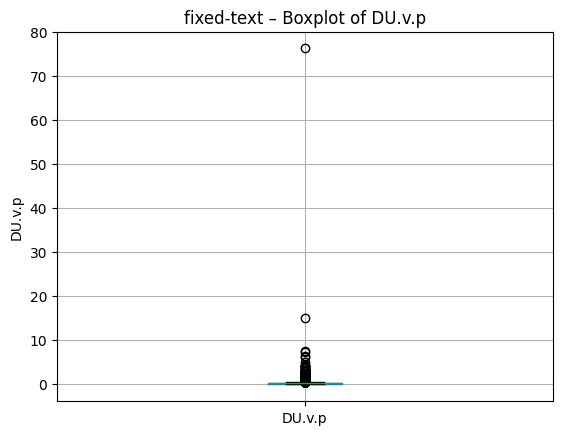

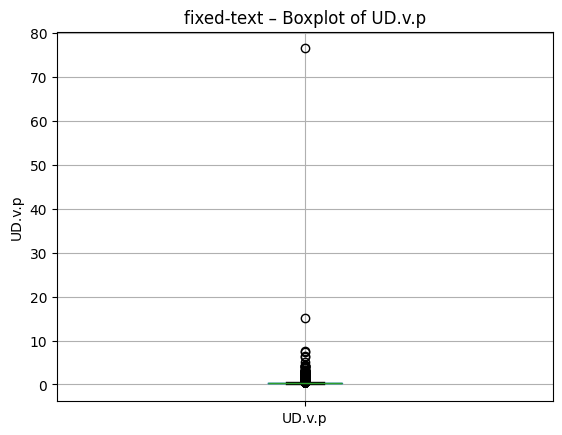

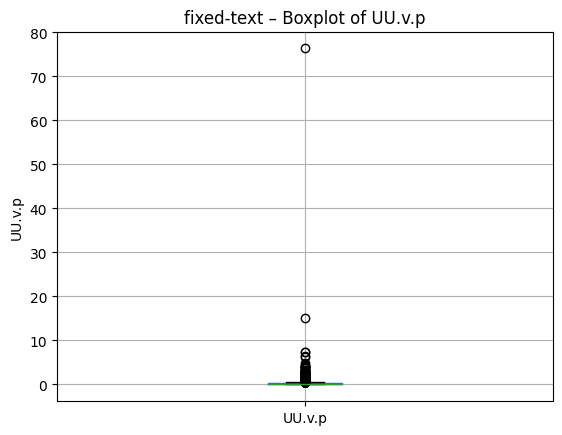

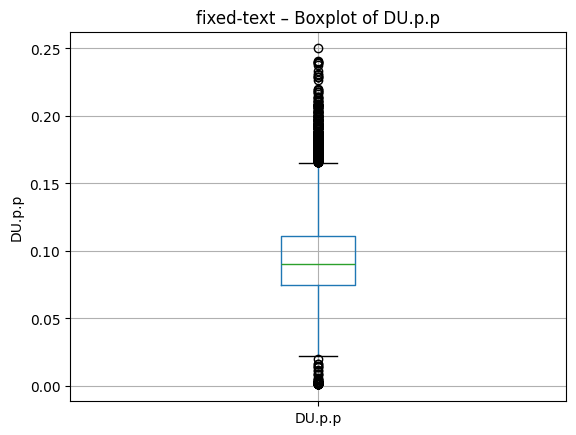

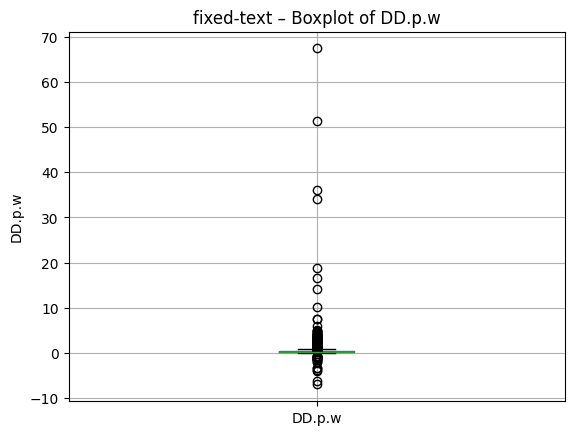

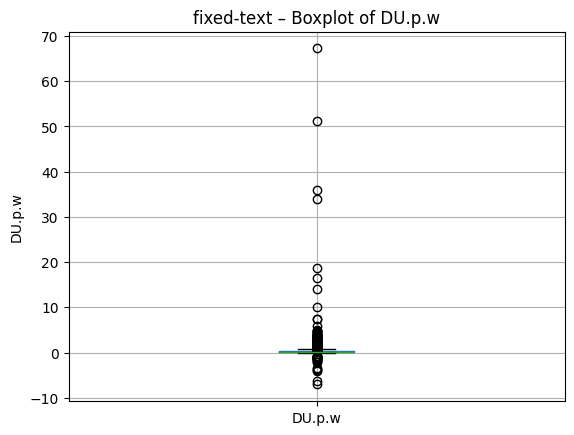

In [15]:
def plot_boxplots(df, tag, max_cols=10):
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()[:max_cols]
    for col in num_cols:
        plt.figure()
        df[[col]].boxplot()
        plt.title(f"{tag} – Boxplot of {col}")
        plt.ylabel(col)
        plt.show()

plot_boxplots(fixed_text_df, "fixed-text")


 Correlation Heatmap (first N numeric cols)

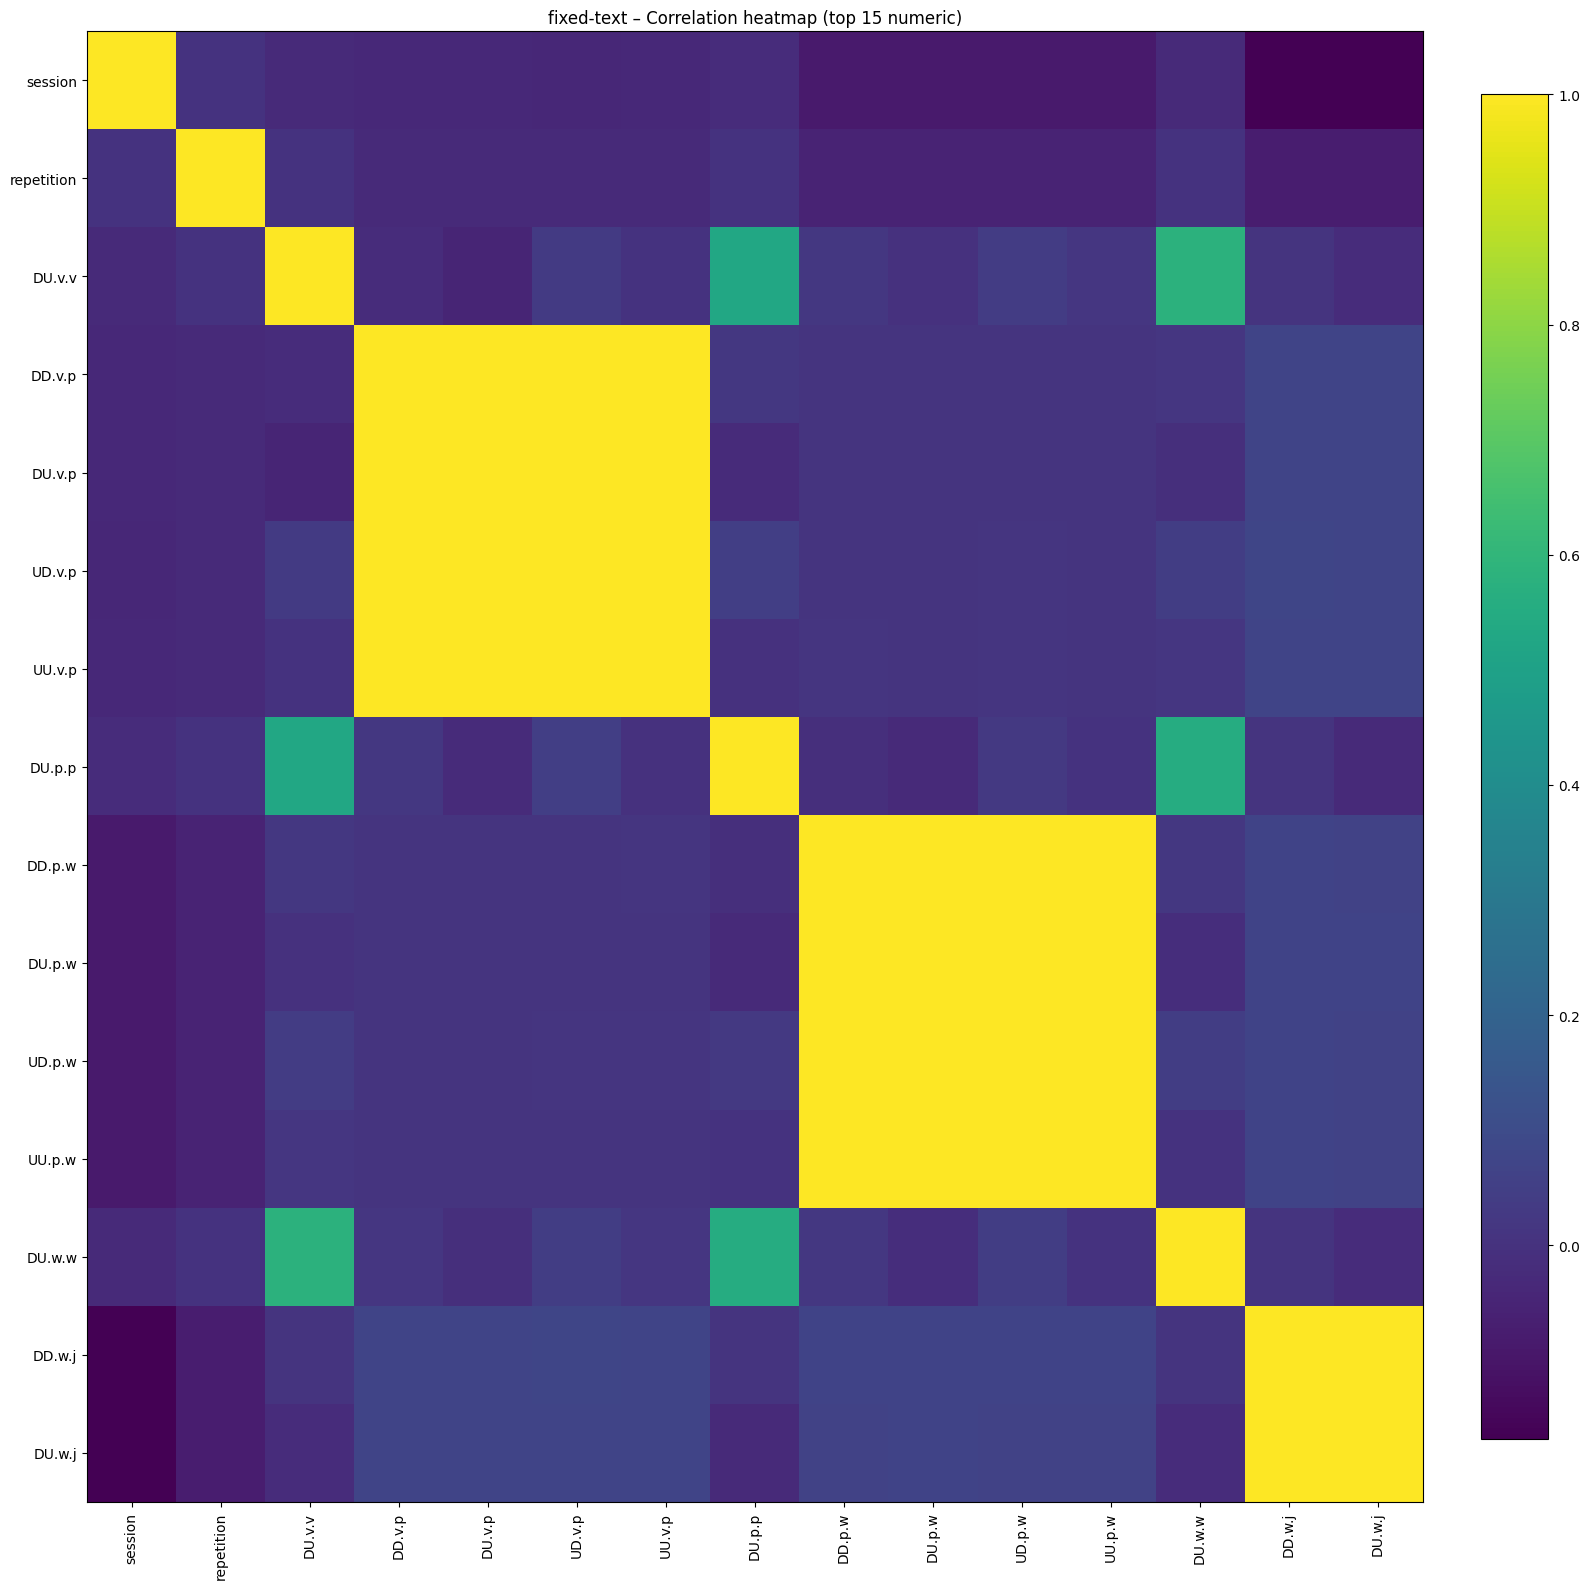

In [16]:
def corr_heatmap(df, tag, top_n=15):
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()[:top_n]
    if len(num_cols) < 2:
        print(f"[{tag}] Not enough numeric columns for heatmap.")
        return
    corr = df[num_cols].corr()
    fig, ax = plt.subplots(figsize=(min(1.0*len(num_cols)+4, 16), min(1.0*len(num_cols)+4, 16)))
    im = ax.imshow(corr.values, aspect='auto')
    ax.set_xticks(np.arange(len(num_cols))); ax.set_yticks(np.arange(len(num_cols)))
    ax.set_xticklabels(num_cols, rotation=90); ax.set_yticklabels(num_cols)
    plt.title(f"{tag} – Correlation heatmap (top {len(num_cols)} numeric)")
    plt.colorbar(im, fraction=0.046, pad=0.04)
    plt.tight_layout()
    plt.show()

corr_heatmap(fixed_text_df, "fixed-text", top_n=15)


Pairwise Relationships (Scatter Matrix, first 4 numeric cols)

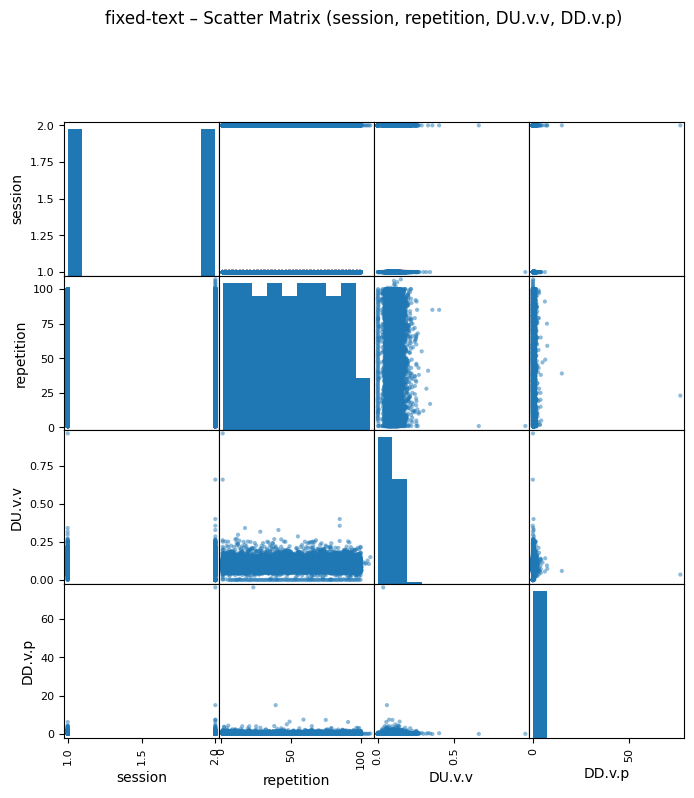

In [17]:
def pairwise_scatter(df, tag, cols=4):
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()[:cols]
    if len(num_cols) < 2:
        print(f"[{tag}] Not enough numeric columns for scatter matrix.")
        return
    axarr = scatter_matrix(df[num_cols], figsize=(8, 8), diagonal='hist')
    plt.suptitle(f"{tag} – Scatter Matrix ({', '.join(num_cols)})", y=1.02)
    plt.show()

pairwise_scatter(fixed_text_df, "fixed-text", cols=4)


Data Quality Checks

In [18]:
print("=== Missing Values per Column ===")
print("\n[demographics]\n", demographics_df.isna().sum())
print("\n[fixed-text]\n", fixed_text_df.isna().sum())

print("\n=== Duplicate Records ===")
print("Demographics:", demographics_df.duplicated().sum())
print("Fixed-text:", fixed_text_df.duplicated().sum())

# Simple outlier detection using IQR on one example column
def iqr_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    return series[(series < lower) | (series > upper)]

example_col = fixed_text_df.select_dtypes(include=[np.number]).columns[0]
outliers = iqr_outliers(fixed_text_df[example_col])
print(f"\nOutliers in {example_col}: {len(outliers)} found")


=== Missing Values per Column ===

[demographics]
 participant    0
handedness     0
age            0
gender         0
nationality    0
dtype: int64

[fixed-text]
 participant    0
session        0
repetition     0
DU.v.v         0
DD.v.p         0
DU.v.p         0
UD.v.p         0
UU.v.p         0
DU.p.p         0
DD.p.w         0
DU.p.w         0
UD.p.w         0
UU.p.w         0
DU.w.w         0
DD.w.j         0
DU.w.j         0
UD.w.j         0
UU.w.j         0
DU.j.j         0
DD.j.k         0
DU.j.k         0
UD.j.k         0
UU.j.k         0
DU.k.k         0
DD.k.e         0
DU.k.e         0
UD.k.e         0
UU.k.e         0
DU.e.e         0
DD.e.u         0
DU.e.u         0
UD.e.u         0
UU.e.u         0
DU.u.u         0
DD.u.r         0
DU.u.r         0
UD.u.r         0
UU.u.r         0
DU.r.r         0
DD.r.k         0
DU.r.k         0
UD.r.k         0
UU.r.k         0
DU.k.k.1       0
DD.k.b         0
DU.k.b         0
UD.k.b         0
UU.k.b         0
DU.b.b         0
tot

Week 3

Handle Missing Data

In [19]:
from sklearn.impute import SimpleImputer

# Numeric: fill with median
num_cols = fixed_text_df.select_dtypes(include=[np.number]).columns
num_imputer = SimpleImputer(strategy='median')
fixed_text_df[num_cols] = num_imputer.fit_transform(fixed_text_df[num_cols])

# Categorical: fill with mode
cat_cols = fixed_text_df.select_dtypes(exclude=[np.number]).columns
cat_imputer = SimpleImputer(strategy='most_frequent')
fixed_text_df[cat_cols] = cat_imputer.fit_transform(fixed_text_df[cat_cols])

print("Missing values after imputation:\n", fixed_text_df.isna().sum().sum())


Missing values after imputation:
 0


Remove Duplicates & Fix Inconsistencies

In [20]:
# Remove duplicate rows
before = fixed_text_df.shape[0]
fixed_text_df.drop_duplicates(inplace=True)
after = fixed_text_df.shape[0]
print(f"Removed {before - after} duplicate rows.")

# Example: standardize a categorical column (if exists)
if 'handedness' in demographics_df.columns:
    demographics_df['handedness'] = demographics_df['handedness'].str.strip().str.title()


Removed 0 duplicate rows.


Detect & Treat Outliers (IQR method)

In [21]:
def cap_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower, lower,
                  np.where(df[col] > upper, upper, df[col]))
    return df

# Apply capping to numeric columns
fixed_text_df = cap_outliers_iqr(fixed_text_df, num_cols)
print("Outlier treatment done (IQR capping).")


Outlier treatment done (IQR capping).


Feature Scaling (Standardization & Normalization)

In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Z-score standardization
scaler = StandardScaler()
fixed_text_df[num_cols] = scaler.fit_transform(fixed_text_df[num_cols])

# Min-Max scaling example (optional — here on first 5 cols)
mm_scaler = MinMaxScaler()
fixed_text_df[num_cols[:5]] = mm_scaler.fit_transform(fixed_text_df[num_cols[:5]])

print("Feature scaling applied.")


Feature scaling applied.


Encode Categorical Variables

In [24]:
from sklearn.preprocessing import OneHotEncoder

# Example: One-hot encode 'handedness' in demographics_df
if 'handedness' in demographics_df.columns:
    ohe = OneHotEncoder(sparse_output=False, drop='first')  # use sparse_output instead of sparse
    encoded = ohe.fit_transform(demographics_df[['handedness']])
    encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(['handedness']))
    demographics_df = pd.concat([demographics_df.drop(columns=['handedness']), encoded_df], axis=1)

print("Categorical encoding complete.")


Categorical encoding complete.


Engineer Domain-Specific Features

In [25]:
# Example for keystroke dynamics: average dwell time per session
if 'DU.v.v' in fixed_text_df.columns and 'session' in fixed_text_df.columns:
    fixed_text_df['avg_dwell_time'] = fixed_text_df.groupby('session')['DU.v.v'].transform('mean')

# Example: flight time ratio between two features
if {'UD.v.p', 'UU.v.p'}.issubset(fixed_text_df.columns):
    fixed_text_df['flight_time_ratio'] = fixed_text_df['UD.v.p'] / (fixed_text_df['UU.v.p'] + 1e-6)

print("Domain-specific features engineered.")


Domain-specific features engineered.


Split Dataset into Train/Validation/Test

In [26]:
from sklearn.model_selection import train_test_split

# Example target: 'total time' — replace with your actual target
target = 'total time'
X = fixed_text_df.drop(columns=[target])
y = fixed_text_df[target]

# Train (70%), temp (30% → split into val/test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")


Train: (13840, 51), Val: (2966, 51), Test: (2966, 51)


Document Preprocessing Pipeline

In [27]:
pipeline_doc = """
WEEK 3 PREPROCESSING PIPELINE
-----------------------------
1. Missing Data:
   - Numeric: median imputation
   - Categorical: mode imputation

2. Duplicate & Inconsistencies:
   - Removed duplicates
   - Standardized categorical strings

3. Outlier Handling:
   - IQR capping (replace extreme values with bounds)

4. Feature Scaling:
   - Z-score standardization for all numeric features
   - Min-Max scaling for first 5 numeric features (example)

5. Categorical Encoding:
   - One-hot encoding for categorical variables

6. Domain-Specific Features:
   - avg_dwell_time per session
   - flight_time_ratio between UD.v.p and UU.v.p

7. Dataset Split:
   - Train (70%), Validation (15%), Test (15%)
"""

with open(os.path.join(folder_path, "Week3_Preprocessing_Report.txt"), "w") as f:
    f.write(pipeline_doc)

print("Preprocessing pipeline documented and saved to Week3_Preprocessing_Report.txt")


Preprocessing pipeline documented and saved to Week3_Preprocessing_Report.txt
